# Title of the work

In [1]:
import pickle
import logging
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from matplotlib import rcParams
rcParams['font.size'] = 14
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# logging.getLogger('tensorflow').setLevel(logging.INFO)
print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.2.0


## Definitions

In [2]:
number_components = [x for x in range(1, 9)]

encoder_layers = [
    [40],
    [100, 40],
    [400, 100, 40],
]
lr = 0.01
# lr = 0.001

optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
# optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)

# dataset_filter = 'all' # done
dataset_filter = 'normal' # doing now


seed = 42
np.random.seed(seed)
number_epochs = 600
test_size = 0.5 # proportion of the number of samples used for testing, i.e., (1-test_size) used for training

figure_format = 'svg'

In [3]:
folder = '/nobackup/carda/datasets/ml-simulation-optical/2019-ecoc-demo'

## Importing dataset

In [4]:
with open(folder + '/compiled-dataset.h5', 'rb') as file:
    final_dataframe, scaled_dataframe, class_columns, class_names = pickle.load(file)
input_dim = final_dataframe.shape[1] - 3 # the last three columns are classes

## Auxiliary functions

In [5]:
def build_model(data_dim, layers, optimizer='sgd', loss='mse', metrics=['mse', 'msle']):
    model = tf.keras.Sequential(name='encoder_' + '-'.join(str(x) for x in layers))
    model.add(tf.keras.layers.Dense(layers[0], input_shape=(data_dim,), name='input_and_0'))
    for i in range(1, len(layers)-1):
        model.add(tf.keras.layers.Dense(layers[i], name=f'encoder_{i}'))
        print('enc:', layers[i], i)
#     model.add(tf.keras.layers.Dense(layers[len(layers)-1], name=f'encoder_{len(layers)-1}', activation='tanh'))
    for i in range(len(layers)-1, -1, -1):
        model.add(tf.keras.layers.Dense(layers[i], name=f'decoder_{i}'))
        print('dec:', layers[i], i)
#         model.add(DenseTied(model.layers[i], name=f'decoder_{i}'))
        
    model.add(tf.keras.layers.Dense(data_dim, name=f'output'))
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return model

## Building training and testing datasets

In [6]:
if dataset_filter == 'normal':
    normal_conditions = scaled_dataframe[(scaled_dataframe['attack'] == 0)].values
else:
    normal_conditions = scaled_dataframe.values
x_train, x_test, y_train, y_test = train_test_split(normal_conditions[:, :input_dim], normal_conditions[:, -1], test_size=test_size, random_state=seed)

## Training the autoencoders

In [7]:
histories = []
for layer in encoder_layers:
    for n_components in number_components:
        final_layer = layer + [n_components]
        print(final_layer)
        model = build_model(input_dim, final_layer, optimizer=optimizer)
        model.summary()
        
        # saving a graphical representation
        tf.keras.utils.plot_model(model, to_file=f'./models/{dataset_filter}_{optimizer._name}_{lr}_{model.name}-model.png', show_shapes=True, show_layer_names=False)

        history = model.fit(x_train, x_train, epochs=number_epochs, batch_size=64, verbose=0, validation_data=(x_test, x_test))
        model.save(f'./models/{dataset_filter}_{optimizer._name}_{lr}_{model.name}-model.h5')
        histories.append(history.history)

[40, 1]
dec: 1 1
dec: 40 0
Model: "encoder_40-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_and_0 (Dense)          (None, 40)                1280      
_________________________________________________________________
decoder_1 (Dense)            (None, 1)                 41        
_________________________________________________________________
decoder_0 (Dense)            (None, 40)                80        
_________________________________________________________________
output (Dense)               (None, 31)                1271      
Total params: 2,672
Trainable params: 2,672
Non-trainable params: 0
_________________________________________________________________
[40, 2]
dec: 2 1
dec: 40 0
Model: "encoder_40-2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_and_0 (Dense)          (None, 40)   

0 -1.1904021427035332 -0.0019840035711725552
0 -1.1904021427035332 -0.0019840035711725552
0 -1.1904021427035332 -0.0019840035711725552
0 -1.1904021427035332 -0.0019840035711725552
0 -1.1904021427035332 -0.0019840035711725552
0 -1.1904021427035332 -0.0019840035711725552
0 -1.1904021427035332 -0.0019840035711725552
0 -1.1904021427035332 -0.0019840035711725552
1 -0.8452026695013046 -0.0014086711158355076
1 -0.8452026695013046 -0.0014086711158355076
1 -0.8452026695013046 -0.0014086711158355076
1 -0.8452026695013046 -0.0014086711158355076
1 -0.8452026695013046 -0.0014086711158355076
1 -0.8452026695013046 -0.0014086711158355076
1 -0.8452026695013046 -0.0014086711158355076
1 -0.8452026695013046 -0.0014086711158355076
2 -1.433691293001175 -0.0023894854883352917
2 -1.433691293001175 -0.0023894854883352917
2 -1.433691293001175 -0.0023894854883352917
2 -1.433691293001175 -0.0023894854883352917
2 -1.433691293001175 -0.0023894854883352917
2 -1.433691293001175 -0.0023894854883352917
2 -1.43369129300

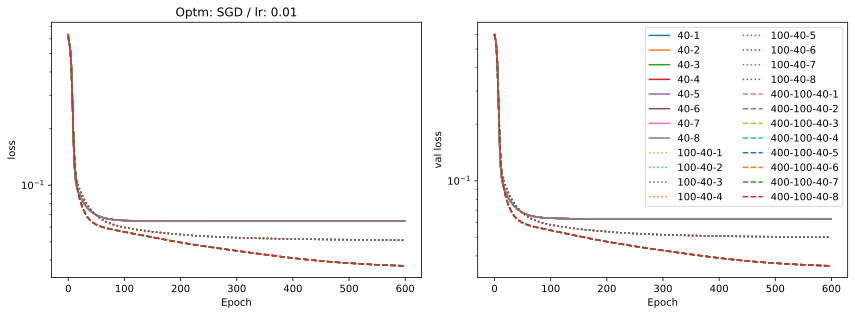

0 -1.1904021427035332 -0.0019840035711725552
0 -1.1904021427035332 -0.0019840035711725552
0 -1.1904021427035332 -0.0019840035711725552
0 -1.1904021427035332 -0.0019840035711725552
0 -1.1904021427035332 -0.0019840035711725552
0 -1.1904021427035332 -0.0019840035711725552
0 -1.1904021427035332 -0.0019840035711725552
0 -1.1904021427035332 -0.0019840035711725552
1 -0.8452026657760143 -0.0014086711096266905
1 -0.8452026657760143 -0.0014086711096266905
1 -0.8452026657760143 -0.0014086711096266905
1 -0.8452026657760143 -0.0014086711096266905
1 -0.8452026657760143 -0.0014086711096266905
1 -0.8452026657760143 -0.0014086711096266905
1 -0.8452026657760143 -0.0014086711096266905
1 -0.8452026657760143 -0.0014086711096266905
2 -1.4336912967264652 -0.0023894854945441086
2 -1.4336912967264652 -0.0023894854945441086
2 -1.4336912967264652 -0.0023894854945441086
2 -1.4336912967264652 -0.0023894854945441086
2 -1.4336912967264652 -0.0023894854945441086
2 -1.4336912967264652 -0.0023894854945441086
2 -1.43369

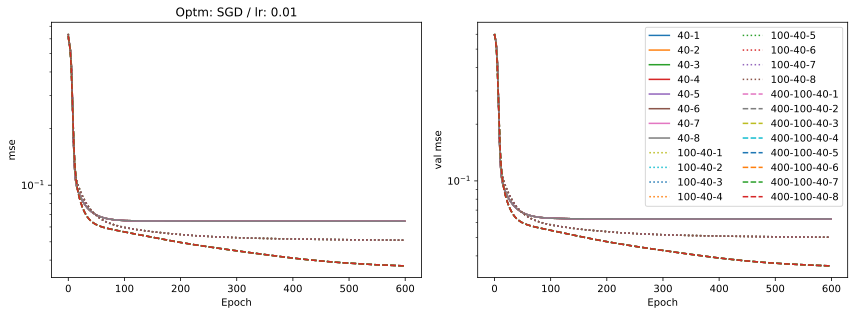

0 -0.20906745176762342 -0.00034844575294603903
0 -0.20906745176762342 -0.00034844575294603903
0 -0.20906745176762342 -0.00034844575294603903
0 -0.20906745176762342 -0.00034844575294603903
0 -0.20906745176762342 -0.00034844575294603903
0 -0.20906745176762342 -0.00034844575294603903
0 -0.20906745176762342 -0.00034844575294603903
0 -0.20906745176762342 -0.00034844575294603903
1 -0.17256165714934468 -0.0002876027619155745
1 -0.17256165714934468 -0.0002876027619155745
1 -0.17256165714934468 -0.0002876027619155745
1 -0.17256165714934468 -0.0002876027619155745
1 -0.17256165714934468 -0.0002876027619155745
1 -0.17256165714934468 -0.0002876027619155745
1 -0.17256165714934468 -0.0002876027619155745
1 -0.17256165714934468 -0.0002876027619155745
2 -0.2012314246967435 -0.00033538570782790583
2 -0.2012314246967435 -0.00033538570782790583
2 -0.2012314246967435 -0.00033538570782790583
2 -0.2012314246967435 -0.00033538570782790583
2 -0.2012314246967435 -0.00033538570782790583
2 -0.2012314246967435 -0.0

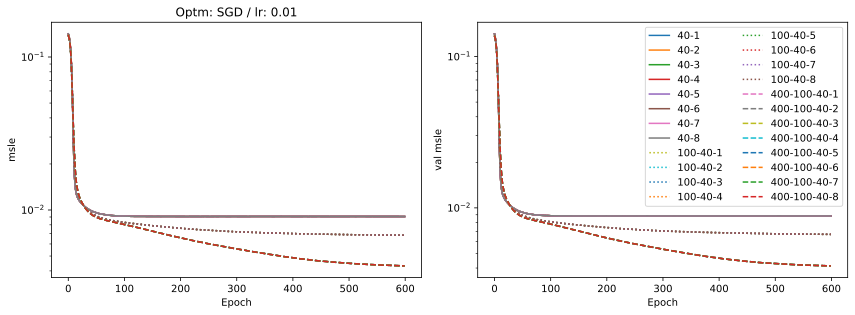

In [8]:
metrics = [x for x in histories[0].keys() if 'val' not in x]
for i, metric in enumerate(metrics):
    plt.figure(figsize=(12, 4.5))
    plt.subplot(1, 2, 1)
    plt.title(f'Optm: {optimizer._name} / lr: {lr}')
    
    for j, layer in enumerate(encoder_layers):
        for n_components in number_components:
            layers = layer + [n_components]
            ls = '-'
            if len(layers) == 2:
                ls = '-'
            elif len(layers) == 3:
                ls = ':'
            elif len(layers) == 4:
                ls = '--'
            plt.semilogy(histories[j][metric], label='-'.join(str(x) for x in layers), linestyle=ls)
    plt.xlabel('Epoch')
    plt.ylabel(metric)
        
    plt.subplot(1, 2, 2)
    for j, layer in enumerate(encoder_layers):
        for n_components in number_components:
            layers = layer + [n_components]
            ls = '-'
            if len(layers) == 2:
                ls = '-'
            elif len(layers) == 3:
                ls = ':'
            elif len(layers) == 4:
                ls = '--'
            diff = np.array(histories[j]['val_' + metric]) - np.array(histories[j][metric])
            print(j, np.sum(diff), np.mean(diff))
            plt.semilogy(histories[j]['val_' + metric], label='-'.join(str(x) for x in layers), linestyle=ls)
    
    plt.xlabel('Epoch')
    plt.ylabel('val ' + metric)
#     plt.xlim([-5, 50])
    plt.legend(ncol=2)
    plt.tight_layout()
    plt.savefig(f'./figures/{dataset_filter}_{optimizer._name}_{lr}_{"-".join(str(x) for x in layers)}-accuracy-{metric}.{figure_format}')
    plt.show()

In [9]:
with open(f'./models/{dataset_filter}_histories.h5', 'wb') as file:
    pickle.dump({'histories': histories}, file)
print('done')

done
